In [1]:
import warnings
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, LSTM
from scipy.misc import imsave
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import pickle
import PIL
warnings.filterwarnings('ignore')
%pylab inline



Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


In [2]:
fd = open('asphalt_gray/1545569951.4771855', 'rb')
dataset = pickle.load(fd)

def data(dataset):
    i=0
    for k in dataset:
        i=i+1
        print(k)
        if(i>20):
            break

def displayData(k):
    print('Time {}, Shape : {}, Key : {}, Type {}'.format(k,dataset[k]['data'].shape,dataset[k]['key'],dataset[k]['type']))
    return PIL.Image.fromarray(dataset[k]['data'])

data(dataset)

1545569814.50331
1545569814.62331
1545569815.1673007
1545569815.3052983
1545569815.5353029
1545569815.6632938
1545569817.187277
1545569817.220276
1545569817.3442736
1545569817.359284
1545569818.8702533
1545569819.0142565
1545569819.6422431
1545569819.7622497
1545569819.807242
1545569819.9052436
1545569822.4602087
1545569826.239168
1545569826.3591652
1545569826.6081579
1545569826.7331572


Time 1545569814.50331, Shape : (245, 480), Key : space, Type down


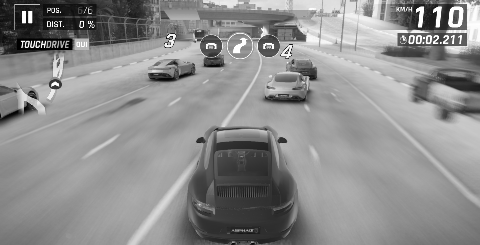

In [3]:
displayData(1545569814.50331)

In [4]:
#CONFIG
size_len=245*480


In [5]:
#print(dataset[1545566870.1522963]['data'].shape)
first_val = list(dataset.values())[0]['data']
n_pixels = np.prod(first_val.shape[1:])
print(n_pixels,len(first_val))

X_train = np.array([dataset[v]['data'].reshape( (1,size_len))  for v in dataset])
print(X_train[:1])

X_train = X_train.astype('float32') / 255.
print(X_train[:5])

for i in X_train:
    print(i[0])
    break

X_train = np.array([ v[0] for v in X_train ])
    
print(X_train.shape)
print(X_train[:5])

480 245
[[[ 26  24  35 ... 111 111 111]]]
[[[0.10196079 0.09411765 0.13725491 ... 0.43529412 0.43529412 0.43529412]]

 [[0.10196079 0.09803922 0.09411765 ... 0.44705883 0.44705883 0.44705883]]

 [[0.16862746 0.16862746 0.16470589 ... 0.38039216 0.3764706  0.3764706 ]]

 [[0.1764706  0.1764706  0.18039216 ... 0.3882353  0.3882353  0.39215687]]

 [[0.0627451  0.07450981 0.08627451 ... 0.3647059  0.36078432 0.3647059 ]]]
[0.10196079 0.09411765 0.13725491 ... 0.43529412 0.43529412 0.43529412]
(126, 117600)
[[0.10196079 0.09411765 0.13725491 ... 0.43529412 0.43529412 0.43529412]
 [0.10196079 0.09803922 0.09411765 ... 0.44705883 0.44705883 0.44705883]
 [0.16862746 0.16862746 0.16470589 ... 0.38039216 0.3764706  0.3764706 ]
 [0.1764706  0.1764706  0.18039216 ... 0.3882353  0.3882353  0.39215687]
 [0.0627451  0.07450981 0.08627451 ... 0.3647059  0.36078432 0.3647059 ]]


In [6]:
def cattoint(val):
    if val =='space':
        return 0
    if val =='s':
        return 1
    if val =='a':
        return 2
    if val =='d':
        return 3
    return -1

Y_train = np.array([ cattoint(dataset[v]['key']) for v in dataset])
print(Y_train)
Y_train=to_categorical(Y_train)


[ 0  0  0  0  2  2  1  1  1  1  0  0  0  0  2  2  3  0  0  0  0  3  3  0
  0  2  2  3  3  3  3  2  2  0  0  0  0  2  2  0  0  1  1  1  1  3  3  2
  2  0  0  0  0  2  2  0  0  0  0  0  0  0  0  2  2  2  2  0  0  3  3  0
  0  3  3  0  0  0  0  1  1  1  1  0  0  0  0  1  1  1  1  0  0  0  0  2
  2  0  0  2  2  0  0  1  1  1  1  0  0  0  0  3  3  0  0  0  0  0  0  0
  0  0  0  0  0 -1]


In [7]:
print(X_train.shape)
print(Y_train.shape)

nb_cat=len(Y_train[0])
print(nb_cat)

(126, 117600)
(126, 4)
4


In [8]:
#Notre AI
model = Sequential()
model.add(Dense(25, activation='relu', input_dim=size_len))
#model.add(Dense(25))
model.add(Dense(nb_cat, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [9]:
# apprentissage
model.fit(X_train, Y_train, epochs=100, verbose=1)

Epoch 1/100
126/126 [==============================] - 3s 27ms/step - loss: 10.4557 - acc: 0.2381
Epoch 2/100
126/126 [==============================] - 0s 1ms/step - loss: 13.3038 - acc: 0.1746
Epoch 3/100
126/126 [==============================] - 0s 1ms/step - loss: 13.3038 - acc: 0.1746
Epoch 4/100
126/126 [==============================] - 0s 1ms/step - loss: 13.3038 - acc: 0.1746
Epoch 5/100
126/126 [==============================] - 0s 1000us/step - loss: 13.3038 - acc: 0.1746
Epoch 6/100
126/126 [==============================] - 0s 1ms/step - loss: 13.3038 - acc: 0.1746
Epoch 7/100
126/126 [==============================] - 0s 1ms/step - loss: 13.3038 - acc: 0.1746
Epoch 8/100
126/126 [==============================] - 0s 977us/step - loss: 13.3038 - acc: 0.1746
Epoch 9/100
126/126 [==============================] - 0s 993us/step - loss: 13.3038 - acc: 0.1746
Epoch 10/100
126/126 [==============================] - 0s 1ms/step - loss: 13.3038 - acc: 0.1746
Epoch 11/100
126/126 

126/126 [==============================] - 0s 984us/step - loss: 13.3038 - acc: 0.1746
Epoch 84/100
126/126 [==============================] - 0s 1000us/step - loss: 13.3038 - acc: 0.1746
Epoch 85/100
126/126 [==============================] - 0s 1ms/step - loss: 13.3038 - acc: 0.1746
Epoch 86/100
126/126 [==============================] - 0s 1ms/step - loss: 13.3038 - acc: 0.1746
Epoch 87/100
126/126 [==============================] - 0s 1ms/step - loss: 13.3038 - acc: 0.1746
Epoch 88/100
126/126 [==============================] - 0s 992us/step - loss: 13.3038 - acc: 0.1746
Epoch 89/100
126/126 [==============================] - 0s 968us/step - loss: 13.3038 - acc: 0.1746
Epoch 90/100
126/126 [==============================] - 0s 1ms/step - loss: 13.3038 - acc: 0.1746
Epoch 91/100
126/126 [==============================] - 0s 1ms/step - loss: 13.3038 - acc: 0.1746
Epoch 92/100
126/126 [==============================] - 0s 992us/step - loss: 13.3038 - acc: 0.1746
Epoch 93/100
126/126 [

In [21]:
pred = model.predict(X_train[:5].reshape((5,size_len)), verbose=1)
print(pred)

5/5 [==============================] - 0s 996us/step
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]
